In [1]:
# %matplotlib Qt5

import numpy as np
import matplotlib.pyplot as plt

from siriuspy.devices import DVF

from mathphys import images

# DVF

In [4]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

In [5]:
dvf.pvnames

{'CAX:B:BASLER01:Trans1:EnableCallbacks',
 'CAX:B:BASLER01:Trans1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:cam1:Acquire',
 'CAX:B:BASLER01:cam1:AcquirePeriod',
 'CAX:B:BASLER01:cam1:AcquirePeriod_RBV',
 'CAX:B:BASLER01:cam1:AcquireTime',
 'CAX:B:BASLER01:cam1:AcquireTime_RBV',
 'CAX:B:BASLER01:cam1:Acquire_RBV',
 'CAX:B:BASLER01:cam1:ArrayCallbacks',
 'CAX:B:BASLER01:cam1:ArrayCallbacks_RBV',
 'CAX:B:BASLER01:ffmstream1:EnableCallbacks',
 'CAX:B:BASLER01:ffmstream1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:image1:ArrayData',
 'CAX:B:BASLER01:image1:EnableCallbacks',
 'CAX:B:BASLER01:image1:EnableCallbacks_RBV'}

In [6]:
dvf.connected

True

In [5]:
dvf.cmd_acquire_on()

True

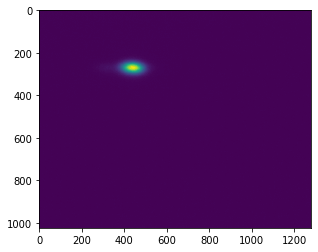

In [7]:
plt.imshow(dvf.image)

In [ ]:
data = dvf.image

# Image2D

In [2]:
# data = dvf.image
data = images.Image2D.generate_gaussian_2d(
    amp=250, angle=10*np.pi/180, offset=0, rand_amp=0,
    saturation_intensity=None,
    sizex=1280, sigmax=50, meanx=500,
    sizey=1024, sigmay=20, meany=600,
)
img = images.Image2D(data=data)
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 9.41756150356134e-261
intensity_max   : 250.0
intensity_avg   : 1.1984224905356573
intensity_sum   : 1570796.3267948967
saturated       : False


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f716a5829b0>)

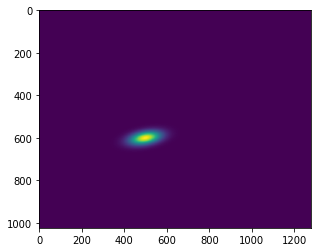

In [3]:
img.imshow()

In [9]:
# saturate image for testing 

refval = int(0.8 * img.intensity_max)
sel = img.data > refval
img.data[sel] = img.intensity_max

In [10]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : -0.9999993634774067
intensity_max   : 255.60981459855213
intensity_avg   : 1.2515343852608805
intensity_sum   : 1640411.1494491412
saturated       : True


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7162069860>)

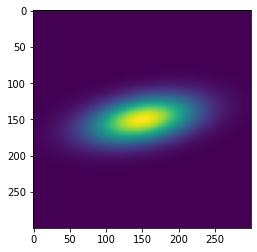

In [4]:
img.imshow(cropx=[350,650], cropy=[450,750])

In [5]:
img.is_saturated

False

In [6]:
%timeit img = images.Image2D(data=data)

474 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
data = np.random.randint(0,255,size=[1024,1280])
%timeit a = data.min()

714 µs ± 4.74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%timeit data = images.Image2D.generate_gaussian_2d(amp=250, angle=10*np.pi/180, offset=0, rand_amp=0, saturation_intensity=None, sizex=1280, sigmax=50, meanx=500, sizey=1024, sigmay=20, meany=600)

43.8 ms ± 900 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%timeit img.intensity_min

635 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%timeit img.intensity_sum

809 µs ± 5.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%timeit img.is_saturated

4.86 ms ± 60.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Image2D_ROI

In [2]:
# data = dvf.image
data = images.Image2D.generate_gaussian_2d(
    amp=250, angle=10*np.pi/180, offset=0, rand_amp=0,
    saturation_intensity=None,
    sizex=1280, sigmax=50, meanx=500,
    sizey=1024, sigmay=20, meany=600,
)
img = images.Image2D_ROI(data=data)
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 9.41756150356134e-261
intensity_max   : 250.0
intensity_avg   : 1.1984224905356573
intensity_sum   : 1570796.3267948967
saturated       : False
roiy            : [0, 1024]
roix            : [0, 1280]
roiy_center     : 600
roix_center     : 500
roiy_fwhm       : 50
roix_fwhm       : 116


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ab8c36908>)

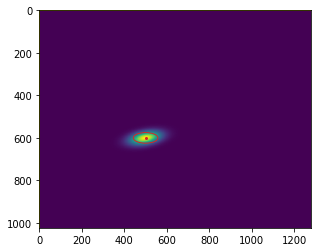

In [3]:
img.imshow()

In [4]:
x0, y0 = int(img.roix_center), int(img.roiy_center)
sx, sy = int(1.0*img.roix_fwhm), int(1.0*img.roiy_fwhm)
coef = 2.0
roix = [int(x0 - coef*sx), int(x0 + coef*sx)]
roiy = [int(y0 - coef*sy), int(y0 + coef*sy)]
img.roi = [roix, roiy]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e5a2de710>)

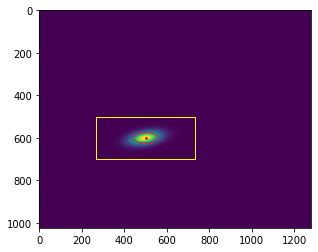

In [9]:
img.imshow()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ab071f828>)

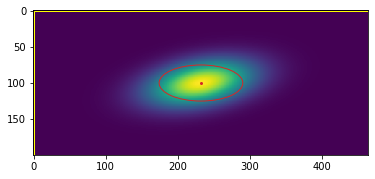

In [5]:
img.imshow(cropx=img.roix, cropy=img.roiy)

In [6]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 9.41756150356134e-261
intensity_max   : 250.0
intensity_avg   : 1.1984224905356573
intensity_sum   : 1570796.3267948967
saturated       : False
roiy            : [500, 700]
roix            : [268, 732]
roiy_center     : 600
roix_center     : 500
roiy_fwhm       : 50
roix_fwhm       : 116


In [7]:
%timeit img = images.Image2D_ROI(data)

3.17 ms ± 475 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%timeit img.calc_proj_parameters(img.data, 0)

874 µs ± 4.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit img.create_trimmed()

1.56 ms ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
data = dvf.image
%timeit image.Image2DROI(data=data)

1.57 ms ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Image2D_CMom

In [26]:
# data = dvf.image
data = create_image(saturation_level=None)
img = image.Image2D_CMom(data)

In [27]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 9.605912733632567e-261
intensity_max   : 255.0
intensity_avg   : 1.2223909403463709
intensity_sum   : 1602212.253330795
saturated       : False
roiy            : [0, 1024]
roix            : [0, 1280]
roiy_center     : 600
roix_center     : 500
roiy_fwhm       : 50
roix_fwhm       : 116
roi_meanx       : 500.0
roi_meany       : 600.0000000000001
roi_sigmax      : 54.57629702699901
roi_sigmay      : 23.79835140981942
roi_angle       : -1.4888835758979924


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d11d95ac8>)

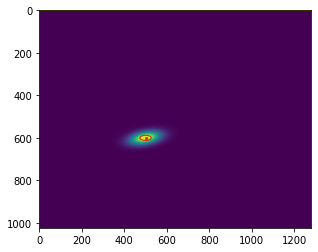

In [5]:
img.imshow()

In [6]:
img.roix = [0, 1000]
img.roiy = [400, 800]

sizey           : 1024
sizex           : 1280
intensity_min   : 9.605912733632567e-261
intensity_max   : 255.0
intensity_avg   : 1.2223909403463709
intensity_sum   : 1602212.253330795
saturated       : False
roiy            : [400, 800]
roix            : [0, 1000]
roiy_center     : 600
roix_center     : 500
roiy_fwhm       : 50
roix_fwhm       : 116
roi_meanx       : 500.00000000000006
roi_meany       : 600.0
roi_sigmax      : 98.79365048279605
roi_sigmay      : 43.07961769713597
roi_angle       : -1.5254750742642278


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d07efea20>)

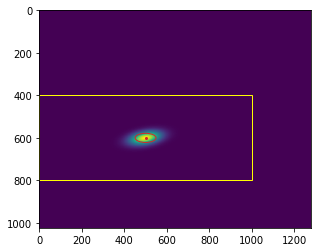

In [7]:
print(img)
img.imshow()

In [10]:
%timeit img._calc_cmom1()

17.6 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%timeit img.calc_central_moment(2, 0)

9.98 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit img._update_image_roi()

30.8 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Image2D_Fit

In [16]:
# data = dvf.image

data = images.Image2D.generate_gaussian_2d(
    amp=255, angle=0*np.pi/180, offset=0, random_size=2, saturation_level=None,
    indcsx=[0,1280], sigmax=50, meanx=500,
    indcsy=[0,1024], sigmay=20, meany=600,
)

img = images.Image2D_Fit(data=data)

In [17]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : -0.9999977687863055
intensity_max   : 255.58503171858015
intensity_avg   : 1.2216690619472719
intensity_sum   : 1601266.0728755281
saturated       : False
roiy            : [0, 1024]
roix            : [0, 1280]
roiy_center     : 600
roix_center     : 501
roiy_fwhm       : 46
roix_fwhm       : 116
roiy_sigma      : 174.1554581030067
roix_sigma      : 191.05351438965403
roiy_mean       : 552.0912902625774
roix_mean       : 567.3431146626244
roiy_amplitude  : 169.93507048877535
roix_amplitude  : 437.86925388568545
roiy_gauss_err  : 99.29444651449963 %
roix_gauss_err  : 95.72225868456864 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c64fe4860>)

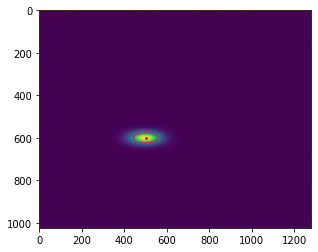

In [18]:
img.imshow()

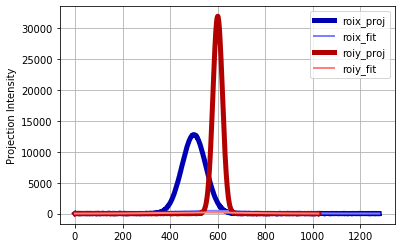

In [19]:
img.plot_projections()

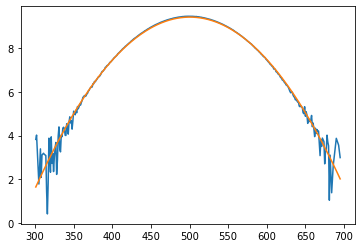

In [36]:
roi = [300, 700]  # img.roix
sel_roi = (roi[0] < img.roix_indcs) & (img.roix_indcs < roi[1])
sel = (img.roix_proj > 0) & sel_roi
vecx, vecy = img.roix_indcs[sel], np.log(img.roix_proj[sel])
pfit = np.polyfit(vecx, vecy, 2)
vecy_fit = np.polyval(pfit, vecx)

plt.plot(vecx, vecy, label='data')
plt.plot(vecx, vecy_fit, label='fit')

In [10]:
x0, y0 = int(img.roix_center), int(img.roiy_center)
sx, sy = int(1.0*img.roix_fwhm), int(1.0*img.roiy_fwhm)
coef = 1.0
roix = [int(x0 - coef*sx), int(x0 + coef*sx)]
roiy = [int(y0 - coef*sy), int(y0 + coef*sy)]
img.roi = [roix, roiy]

In [11]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : -0.9999992270036685
intensity_max   : 255.84766763912393
intensity_avg   : 1.2222990887751775
intensity_sum   : 1602091.8616394007
saturated       : False
roiy            : [550, 650]
roix            : [384, 616]
roiy_center     : 600
roix_center     : 501
roiy_fwhm       : 50
roix_fwhm       : 114
roiy_sigma      : 21.37825840503344
roix_sigma      : 49.03315220774056
roiy_mean       : 600.0101746590815
roix_mean       : 500.05914256183
roiy_amplitude  : 29343.748907876932
roix_amplitude  : 12775.087795128018
roiy_gauss_err  : 0.07472002782570596 %
roix_gauss_err  : 0.08614011458728582 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c650f60b8>)

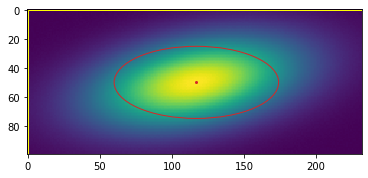

In [12]:
img.imshow(cropx=img.roix, cropy=img.roiy)

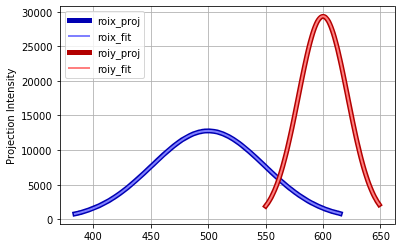

In [13]:
img.plot_projections()

# Scipy.curve_fit

In [45]:
from mathphys.functions import save_pickle

save_pickle(dvf.image, 'beam_img_5')

In [48]:
from scipy.optimize import curve_fit

In [53]:
?curve_fit

In [52]:
def gauss(x, offset, amp, mean, sigma):
    return offset + amp * np.exp(-0.5*((x - mean)/sigma)**2)

In [54]:
p0 = (0, 4000, 450, 35)

(array([  95.21240671, 3923.50369668,  436.36269082,   33.89514178]),
 array([[ 1.59739227e+02, -1.30630489e+02,  6.30046149e-03,
         -1.59736735e+00],
        [-1.30630489e+02,  1.38392327e+02, -5.52073100e-03,
          1.11800422e+00],
        [ 6.30046149e-03, -5.52073100e-03,  3.12811195e-03,
         -5.51439078e-05],
        [-1.59736735e+00,  1.11800422e+00, -5.51439078e-05,
          1.92560006e-02]]))

In [69]:
x, y = img.roix_indcs, img.roix_proj
p, _ = curve_fit(gauss, x, y , p0)
yfit = gauss(x, *p)

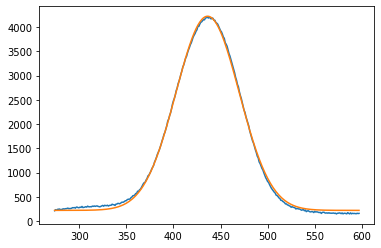

In [70]:
plt.plot(x, y)
plt.plot(x, yfit)
plt.show()

In [71]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 105
intensity_avg   : 1.2360107421875
intensity_sum   : 1620064
saturated       : False
roiy            : [197, 345]
roix            : [274, 598]
roiy_center     : 272
roix_center     : 436
roiy_fwhm       : 37
roix_fwhm       : 81
roiy_sigma      : 27.54266219650197
roix_sigma      : 62.504422945912005
roiy_mean       : 271.95580204262967
roix_mean       : 429.3134707636719
roiy_amplitude  : 4658.488918410126
roix_amplitude  : 2046.4641107258974
roiy_gauss_err  : 42.51819850708045 %
roix_gauss_err  : 45.52227850679792 %


In [72]:
p

array([ 219.89923765, 4001.73337729,  436.30238679,   33.57719957])